In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入数据集
data = pd.read_csv(r"boston_housing,csv1")

In [3]:
class LR:
    
    #属性
    def __init__(self,alpha,times):
        #alpha代表学习率
        #times代表循环迭代的次数
        self.alpha = alpha
        self.times = times
        
    ##模型训练
    def fit(self,X,y):
        
        X = np.asarray(X)
        y = np.asarray(y)
        
        #初始化权重为0，并且比特征数量多1作为截距
        self.w_ = np.zeros(1 + X.shape[1])
        
        #初始化损失列表为空，并且用来存储损失值
        self.lose_ = []

        #循环迭代给定次数，每次迭代都会去利用预测值和真实值的差值去调整权重和截距
        for i in range(self.times):
            #计算预测值
            y_hat = np.dot(X,self.w_[1:]) + self.w_[0]
            
            #计算预测值和真实值的差值
            error = y_hat - y
            
            #将损失值加入的损失列表里
            #损失值=差值的平方和除于2
            self.lose_.append(np.sum(error ** 2) / 2)
            
            #自动调整权重和偏置
            self.w_[0] -= self.alpha * np.sum(error)
            self.w_[1:] -= self.alpha * np.dot(X.T,error)
            
    ##预测
    def predict(self,X):
        X = np.asarray(X)
        result = np.dot(X,self.w_[1:]) + self.w_[0]
        return result

In [4]:
#Z-score标准化对数据进行标准化处理
class StanderScaler:
    def fit(self,X):
        X = np.asarray(X)
        self.std_ = np.std(X,axis=0)
        self.mean_ = np.mean(X,axis=0)
    def transform(self,X):
        return (X - self.mean_) / self.std_
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)

In [5]:
#对每个特征进行标准化处理
s = StanderScaler()
data_s = s.fit_transform(data)
t = data_s.sample(len(data_s),random_state=0)

#分割数据集
#训练集
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
#测试集
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

#训练
lr = LR(0.0005,20)
lr.fit(train_X,train_y)

#测试
result = lr.predict(test_X)

display(np.mean(result - test_y) ** 2)
display(lr.w_)
display(lr.lose_)

2.2543380521165273e-06

array([-0.00048901, -0.07781362,  0.03453764, -0.03959806, -0.11430192,
        0.31910275, -0.00670328, -0.20863205,  0.10286438, -0.05750209,
       -0.19066886,  0.09730908, -0.39133732])

[189.32507977160466,
 103.18942172991595,
 86.48792198545124,
 77.60838961364371,
 72.08934881268733,
 68.55640737324761,
 66.23745888658217,
 64.66940096760518,
 63.57164427472405,
 62.77297345949859,
 62.16808429383182,
 61.6916098084334,
 61.302528978199035,
 60.97476359040761,
 60.691478000946915,
 60.44160401312432,
 60.21770899020079,
 60.01467887373663,
 59.828898276111715,
 59.65773558656283]

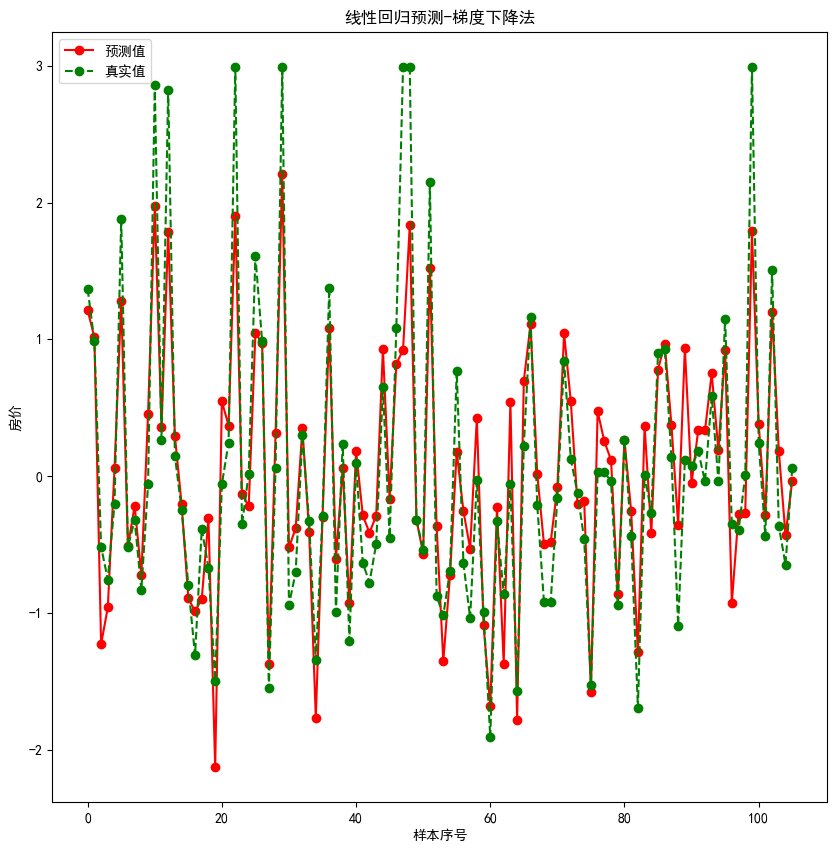

In [6]:
#直线拟合可视化
plt.rcParams['font.family'] = 'SimHei' #设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False #设置在中文字体是能够正常显示负号（“-”）
 
plt.figure(figsize=(10,10))
#绘制预测值
plt.plot(result,'ro-',label="预测值")

plt.plot(test_y.values,'go--',label="真实值")
plt.title("线性回归预测-梯度下降法")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()